In [56]:
import visual_behavior.database as db
import visual_behavior.utilities as vbu
import pandas as pd
import numpy as np
import os
from visual_behavior.translator.foraging2 import data_to_change_detection_core

import visual_behavior.data_access.loading as loading

import matplotlib.pyplot as plt

In [48]:
%matplotlib notebook
%widescreen

UsageError: Line magic function `%widescreen` not found.


In [8]:
osid = 945124131

In [9]:
pkl_path = db.get_pkl_path(session_id = osid, id_type='ophys_session_id')
pkl_data = pd.read_pickle(pkl_path)

In [14]:
core_data = data_to_change_detection_core(pkl_data)

In [16]:
len(core_data['time'])

269865

In [18]:
vbu.get_sync_data?

In [19]:
pkl_path

'/allen/programs/braintv/production/neuralcoding/prod0/specimen_840378937/behavior_session_945277725/945124131.pkl'

In [29]:
wkf = db.get_well_known_files(osid)
sync_path = ''.join([wkf.loc['OphysRigSync']['storage_directory'], wkf.loc['OphysRigSync']['filename']])
sync_data = vbu.get_sync_data(sync_path)

In [32]:
len(sync_data['stim_vsync_falling'])

269703

In [38]:
len(sync_data['stim_vsync_rising'])

269704

<IPython.core.display.Javascript object>


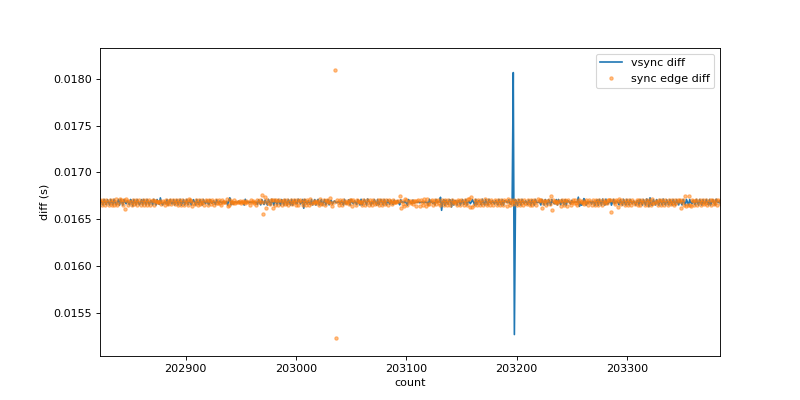

Text(0, 0.5, 'diff (s)')

In [55]:
fig, ax = plt.subplots(figsize=(10,5))
ax.plot(
    np.diff(core_data['time'])
)
ax.plot(
    np.diff(sync_data['stim_vsync_falling']),
    marker = '.',
    linestyle = 'none',
    alpha=0.5
)

ax.legend(['vsync diff','sync edge diff'])
ax.set_xlabel('count')
ax.set_ylabel('diff (s)')

In [39]:
197-33

164

In [40]:
269865-269703

162

In [54]:
203196-203034

162

In [61]:
osid = 945124131
oeids = db.lims_query('select id from ophys_experiments where ophys_session_id = {}'.format(osid))
oeid = oeids.loc[0][0]
oeid

945586458

loading data for 945586458_453989_190912_VISl_0_Vip-IRES-Cre_MESO.1_behavior_225


In [94]:
def add_dff_stats_to_specimen_table(session):
    '''
    merges statistics about df/f to the cell specimen table
    operates inplace
    returns the table with additional columns
    '''
    dff_stats = []
    for csid,row in session.cell_specimen_table.iterrows():
        dff = session.dff_traces.loc[csid]['dff']
        dff_stats_single = pd.Series(dff).describe().to_dict()
        dff_stats_single.update({
            'cell_specimen_id': csid,
        })

        dff_stats.append(dff_stats_single)

    dff_stats = pd.DataFrame(dff_stats).set_index('cell_specimen_id')
    df = session.cell_specimen_table.merge(
        dff_stats,
        left_index = True,
        right_index = True
    )
    return df

In [96]:
import visual_behavior.data_access.loading as loading

oeid = 945586458
session = loading.get_ophys_dataset(oeid)

add_dff_stats_to_specimen_table(session)

loading data for 945586458_453989_190912_VISl_0_Vip-IRES-Cre_MESO.1_behavior_225


,cell_roi_id,height,image_mask,mask_image_plane,max_correction_down,max_correction_left,max_correction_right,max_correction_up,valid_roi,width,...,y,roi_mask,count,mean,std,min,25%,50%,75%,max
cell_specimen_id,,,,,,,,,,,,,,,,,,,,,
1065772528,945636517,13,"[[False, False, False, False, False, False, Fa...",0,13.0373,8.58747,7.97365,2.99062,True,16,...,357,"[[False, False, False, False, False, False, Fa...",48282.0,0.063956,0.412197,-1.653297,-0.173886,0.007973,0.230774,9.511762
1065772656,945636521,19,"[[False, False, False, False, False, False, Fa...",0,13.0373,8.58747,7.97365,2.99062,True,16,...,330,"[[False, False, False, False, False, False, Fa...",48282.0,0.071712,0.359478,-0.814048,-0.126543,0.003989,0.171768,9.575090
1065771819,945636526,17,"[[False, False, False, False, False, False, Fa...",0,13.0373,8.58747,7.97365,2.99062,True,22,...,316,"[[False, False, False, False, False, False, Fa...",48282.0,0.110052,0.455931,-1.160410,-0.105856,0.012367,0.172936,7.367701
1065771760,945636531,15,"[[False, False, False, False, False, False, Fa...",0,13.0373,8.58747,7.97365,2.99062,True,12,...,312,"[[False, False, False, False, False, False, Fa...",48282.0,0.094587,0.562028,-2.301327,-0.245160,0.011024,0.326021,7.447715
1065771576,945636538,17,"[[False, False, False, False, False, False, Fa...",0,13.0373,8.58747,7.97365,2.99062,True,21,...,278,"[[False, False, False, False, False, False, Fa...",48282.0,0.042915,0.230471,-0.666957,-0.080657,0.001713,0.104918,3.128950
1065772755,945636541,16,"[[False, False, False, False, False, False, Fa...",0,13.0373,8.58747,7.97365,2.99062,True,20,...,267,"[[False, False, False, False, False, False, Fa...",48282.0,0.036931,0.205467,-0.536752,-0.080289,0.002032,0.102364,2.733393
1065771176,945636546,17,"[[False, False, False, False, False, False, Fa...",0,13.0373,8.58747,7.97365,2.99062,True,17,...,243,"[[False, False, False, False, False, False, Fa...",48282.0,0.011874,0.126323,-0.474189,-0.069370,0.000000,0.078240,2.025595
1065772353,945636548,13,"[[False, False, False, False, False, False, Fa...",0,13.0373,8.58747,7.97365,2.99062,True,17,...,393,"[[False, False, False, False, False, False, Fa...",48282.0,0.103811,0.524724,-1.990314,-0.166336,0.014970,0.239731,12.343264
1065772437,945636550,16,"[[False, False, False, False, False, False, Fa...",0,13.0373,8.58747,7.97365,2.99062,True,13,...,379,"[[False, False, False, False, False, False, Fa...",48282.0,0.071065,0.287864,-0.993455,-0.083247,0.007934,0.137232,3.356736


In [70]:
session.cell_specimen_table

,cell_roi_id,height,image_mask,mask_image_plane,max_correction_down,max_correction_left,max_correction_right,max_correction_up,valid_roi,width,x,y,roi_mask
cell_specimen_id,,,,,,,,,,,,,
1065772528,945636517,13,"[[False, False, False, False, False, False, Fa...",0,13.0373,8.58747,7.97365,2.99062,True,16,389,357,"[[False, False, False, False, False, False, Fa..."
1065772656,945636521,19,"[[False, False, False, False, False, False, Fa...",0,13.0373,8.58747,7.97365,2.99062,True,16,322,330,"[[False, False, False, False, False, False, Fa..."
1065771819,945636526,17,"[[False, False, False, False, False, False, Fa...",0,13.0373,8.58747,7.97365,2.99062,True,22,430,316,"[[False, False, False, False, False, False, Fa..."
1065771760,945636531,15,"[[False, False, False, False, False, False, Fa...",0,13.0373,8.58747,7.97365,2.99062,True,12,40,312,"[[False, False, False, False, False, False, Fa..."
1065771576,945636538,17,"[[False, False, False, False, False, False, Fa...",0,13.0373,8.58747,7.97365,2.99062,True,21,107,278,"[[False, False, False, False, False, False, Fa..."
1065772755,945636541,16,"[[False, False, False, False, False, False, Fa...",0,13.0373,8.58747,7.97365,2.99062,True,20,362,267,"[[False, False, False, False, False, False, Fa..."
1065771176,945636546,17,"[[False, False, False, False, False, False, Fa...",0,13.0373,8.58747,7.97365,2.99062,True,17,421,243,"[[False, False, False, False, False, False, Fa..."
1065772353,945636548,13,"[[False, False, False, False, False, False, Fa...",0,13.0373,8.58747,7.97365,2.99062,True,17,443,393,"[[False, False, False, False, False, False, Fa..."
1065772437,945636550,16,"[[False, False, False, False, False, False, Fa...",0,13.0373,8.58747,7.97365,2.99062,True,13,56,379,"[[False, False, False, False, False, False, Fa..."


In [71]:
session.dff_traces

,cell_roi_id,dff
cell_specimen_id,,
1065772528,945636517,"[8.813734397917225, 9.511761695629433, 7.62324..."
1065772656,945636521,"[9.575089807935775, 8.68897381958794, 7.865316..."
1065771819,945636526,"[6.648798058331366, 5.82965533858456, 5.497390..."
1065771760,945636531,"[4.360227468331885, 1.5690535336624394, 2.0521..."
1065771576,945636538,"[0.987050344946977, 0.7022787550452683, 0.5359..."
1065772755,945636541,"[1.3399812306663628, 0.9554654249582515, 0.768..."
1065771176,945636546,"[1.6274703936303676, 1.5755393746623272, 1.107..."
1065772353,945636548,"[10.289269495094453, 8.282393185233966, 5.6375..."
1065772437,945636550,"[3.3567356753244577, 2.9693886519933015, 2.340..."
